INF200 Lecture No 4
===================

***Hans Ekkehard Plesser, NMBU, 3 October 2022***

# Today's topics

* Administrativa
    - Choosing your project partner and a block
    - Getting started with Git
- Tech assistance
* Representing data
    - Overview
    - Standard containers: Lists, dictionaries, sets
    - More advanced container techniques
    - NumPy arrays

---

# Administrativa

## Choosing your project partner and a block

- Fill in the [quiz on Canvas](https://nmbu.instructure.com/courses/8544/quizzes/12686) by **Sunday, 9 Oct, 23.59**!
    - You must create a GitLab account before you take the quiz
- Selection of block
    - If you cannot participate in one of the blocks for a good reason, you will have priority for a space in the other block.
    - A good reason is primarily a "colliding" mandatory course in one of the blocks, studies abroad or parental leave.
    - Attendance **on campus** is **mandatory** during most of the block, **Mon–Fri from 9–15**.
    - January block
        - Mandatory attendance: 9–25 January
        - Presentation preparation: 26/27 January
        - Exam: 30/31 January
    - June block
        - Mandatory attendance: 5–21 June
        - Presentation preparation: 22/23 June
        - Exam: 26/27 June
- Selection of partner
    - You must collaborate with a partner.
    - You and your partner **must be in the same block**.
    - Change of partner will only be permitted under extraordinary circumstances.

## Getting started with GitLab

- From week 41 onward, we will use a version control system to manage course materials and exercise delivery.
- You must create a GitLab account on https://about.gitlab.com/ by Friday 8 Oct.
    - Register with your NMBU email address!
    - Configure 2-factor authenication!
    - Do this during the exercise groups this week!
- You will practice working with GitLab and Git in the exercise groups next week (12–14 Oct).

## TA assistance

TAs will be available for additional technical help in "Kantinehemsen" *Thursday 08–10*.

---
# Representing data: Overview

- We need to organize data in our code to work with it
    - Keep control: is that value the temperature at noon or the wind speed at midnight?
    - Select data according to different criteria: by name, by location, ...
    - Exchange data between different parts of a large program
    - Perform operations efficiently on large data
- Keeping control is essential
    - If we lose control of what is what, our code will produce incorrect results
    - Wrong results are worse than no results: if the program crashes, we at least know something is wrong!
- Code lives long and passes through many hands
    - Code should be self-documenting
    - Data should be self-documenting
    - Example: Wheather data from frost.met.no

        ```python
          [{'sourceId': 'SN17850:0',
            'referenceTime': '2021-01-01T00:00:00.000Z',
            'observations': [{'elementId': 'mean(air_temperature P1D)',
                              'value': -0.3,
                              'unit': 'degC',
                              'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 2},
                              'timeOffset': 'PT0H',
                              'timeResolution': 'P1D',
                              'timeSeriesId': 0,
                              'performanceCategory': 'C',
                              'exposureCategory': '1',
                              'qualityCode': 0},
        ```
                          
- In this lecture
    - Standard containers for data: lists, dictionaries, sets
    - NumPy arrays
    - Pandas dataframes
- Weeks 42–43
    - Object-oriented programming as a technique for consistent representation of and operations on data

---
# Standard containers: Lists, dictionaries, sets

- We often need to process *collections* of data
    - students in a class
    - series of weather measurements
    - payments in a shop
- Frequently, several items of information are related
    - name, courses taken, grades achieved of a student
    - temperature, humidity, precipitation, wind speed at a given hour
    - items, quantities and prices of goods purchased
- The number of data items we have will change ove time
    - we cannot work with fixed variables, e.g.,
      ```python
      inf200_student1_name = 'Karim'
      inf200_student2_name = 'Elise'
      ...
      inf200_student169_name = 'Ole'
      ```
    - we need flexible *containers*
- General properties of containers
    - We can insert data
    - We can remove data
    - We can access data
    - We can query if an item is in a container
- These general properties apply not only to containers in Python, but also in other programming languages
- Different containers have different specific properties

## The Python list

- The only container you *really* need
    - Everything else can *in principle* be implemented using lists
    - Performance could suffer badly, though; an example follows below
- Python's `list` is a *[random access](https://en.wikipedia.org/wiki/Random_access) container*
    - We can ask for any element in a list—and get it fast.
    - This differs from the meaning of "[list](https://en.wikipedia.org/wiki/List_(abstract_data_type))" in computer science, where it means a sequential container, where we only can move from one element to the next.

### Python list as random access container
- Insert data anywhere in a list

In [7]:
l = [10, 20, 30, 40]
l.append(50)     # at end
l.insert(3, 35)  # before element with index 3
l.insert(0, 5)   # at beginning
print(l)

[5, 10, 20, 30, 35, 40, 50]


- Access and change data

In [8]:
l[4] = 300
l

[5, 10, 20, 30, 300, 40, 50]

- Remove data

In [9]:
del l[4]
l

[5, 10, 20, 30, 40, 50]

- Ask if a value is in a list

In [10]:
20 in l

True

In [11]:
l.index(30)

3

In [12]:
l.index(99)

ValueError: 99 is not in list

### Building lists

#### ... the old fashioned way using a loop

In [13]:
x = []
for n in range(5):
    x.append(n)
x

[0, 1, 2, 3, 4]

- Works, but quite a lot of code
- We write down instructions of how to build the list step by step

#### ... the modern way by [list comprehension](https://en.wikipedia.org/wiki/List_comprehension)

In [14]:
x = [n for n in range(5)]
x

[0, 1, 2, 3, 4]

- Much more compact
- We express our *intent*: what do we want in the list
- We can also perform operations and place conditions on which elements to include

In [15]:
y = [n**3 for n in range(10) if n % 3 == 0]
y

[0, 27, 216, 729]

- This is very close to the mathematical [set-builder notation](https://en.wikipedia.org/wiki/Set-builder_notation)
$$y = \{n^3|0\leq n< 10 \wedge n=0\bmod 3\}$$

#### Building a chessboard

- A chessboard has files (columns) a–h and ranks (rows) 1–8
- Can we generate a list of all column-row combinations from a1 to h8?
- We can use a nested list comprehension

![Chessboard, Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Chess_board_opening_staunton.jpg/300px-Chess_board_opening_staunton.jpg) ![Odometer, Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Odometer2.jpg/250px-Odometer2.jpg)
Source: Wikipedia

In [16]:
chessboard = [chr(ord('a')+file) + str(1+rank) 
              for file in range(8) for rank in range(8)]
print(chessboard)

['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8']


- How does this list comprehension work?
    - The last loop (over `rank`) runs fastest (like the digits on an odometer (tripteller)
    - Every time the `rank`-loop has run through, the `file` loop makes one step
    - We exploit that the capital letters have ordered character codes
        - `ord('a')` gives us the code for a
        - we add 0, 1, ..., 7
        - `chr()` converts the resulting number to a letter
- Can we create a list comprehension to get only the black fields, given that a1 is black?
    - Inspecting the board shows that rank plus file number of black fields is even

In [17]:
chess_black = [chr(ord('a')+file) + str(1+rank) 
               for file in range(8) for rank in range(8)
               if (file + rank) % 2 == 0]
print(chess_black)

['a1', 'a3', 'a5', 'a7', 'b2', 'b4', 'b6', 'b8', 'c1', 'c3', 'c5', 'c7', 'd2', 'd4', 'd6', 'd8', 'e1', 'e3', 'e5', 'e7', 'f2', 'f4', 'f6', 'f8', 'g1', 'g3', 'g5', 'g7', 'h2', 'h4', 'h6', 'h8']


### Simple list operations

#### Iterating forward

In [18]:
l = [11, 22, 33, 44]
for n in l:
    print(n, end=' ')

11 22 33 44 

#### Iterating backwards

In [19]:
for n in reversed(l):
    print(n, end=' ')

44 33 22 11 

#### Iterating with counter

In [20]:
for counter, n in enumerate(l):
    print(f'{counter}:{n}', end=' ')

0:11 1:22 2:33 3:44 

- The examples above show good Python style for working with elements of a list.
    - **Avoid** C-style iteration such as

      ```python
      for i in range(len(l)):
          print(l[i])

      ```
    - That looks like Python spoken with a very heavy accent!

#### Slicing

- Just some examples, experiment yourself!

In [21]:
l[:]

[11, 22, 33, 44]

In [22]:
l[2:]

[33, 44]

In [23]:
l[:2]

[11, 22]

In [24]:
l[::2]

[11, 33]

In [25]:
l[:-1]

[11, 22, 33]

### Lists of lists

- Python lists can *in principle* contain anything, in arbitrary mixture

In [26]:
[1, 5.4, 'a string', ['a list'], {'a': 1}]

[1, 5.4, 'a string', ['a list'], {'a': 1}]

- *In practice*, this is not a good idea and points to a lack of control
- Usually, we want elements of the same type in a list (there are exceptions)
- But lists can contain lists, e.g., student data

In [27]:
students = [['Per', 'Olsen', 'M-DV', ['INF200', 'INF221', 'INF250']],
            ['Kari', 'Hansen', 'M-TDV', ['DAT300', 'DAT390', 'FYS388']]]
students

[['Per', 'Olsen', 'M-DV', ['INF200', 'INF221', 'INF250']],
 ['Kari', 'Hansen', 'M-TDV', ['DAT300', 'DAT390', 'FYS388']]]

- We need to index one level at a time

In [28]:
students[0][1]

'Olsen'

In [29]:
students[1][3][1]

'DAT390'

### Copying lists: beware!

- Assignment only gives a new name, does not copy
- Run the examples in [Python Tutor](https://pythontutor.com/) to see exactly what happens

In [30]:
l = [11, 22, 33, 44]
m = l
l[2] = 0
print(l)
print(m)

[11, 22, 0, 44]
[11, 22, 0, 44]


- `id(x)` shows the memory location of the object called `x`
- We can use it to confirm that `l` and `m` are indeed two names for the same object

In [31]:
id(l)

140540503409280

In [32]:
id(m)

140540503409280

- Two ways of creating a copy

In [33]:
l = [11, 22, 33, 44]
m = l.copy()
k = l[:]
l[2] = 0
print(l)
print(m)
print(k)

[11, 22, 0, 44]
[11, 22, 33, 44]
[11, 22, 33, 44]


- We use `id()` to show that all three names refer to different objects

In [34]:
id(l), id(m), id(k)

(140540503659072, 140540503360832, 140540503187712)

- But beware of nested lists!
- `copy()` and `[:]` create a *shallow* copy!
- [Example in PythonTutor](https://pythontutor.com/render.html#code=l%20%3D%20%5B11,%20%5B22,%2033%5D,%2044%5D%0Am%20%3D%20l.copy%28%29%0Al%5B0%5D%20%3D%200%0Al%5B1%5D%5B0%5D%20%3D%20999&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [35]:
l = [11, [22, 33], 44]
m = l.copy()
l[0] = 0
l[1][0] = 999
print(l)
print(m)

[0, [999, 33], 44]
[11, [999, 33], 44]


- Notice that the change to the inner list has affected `m` as well!
- We need to `deepcopy()` is we want also included lists copied

In [36]:
from copy import deepcopy
l = [11, [22, 33], 44]
m = deepcopy(l)
l[0] = 0
l[1][0] = 999
print(l)
print(m)

[0, [999, 33], 44]
[11, [22, 33], 44]


## Python dictionaries

- What is problematic with storing student data like this?

In [37]:
students = [['Per', 'Olsen', 'M-DV', ['INF200', 'INF221', 'INF250']],
            ['Kari', 'Hansen', 'M-TDV', ['DAT300', 'DAT390', 'FYS388']]]

- To print student names, we would write code such as

In [38]:
for student in students:
    print(student[1])

Olsen
Hansen


- How long will we remember that `0` indexes the first and `1` the last name?
- Will our colleague coding other parts of the problem know?
- What happens if we want to make changes to the code, add new information?
- We need a more robust solution: *dictionaries*
- Also known as [*associative arrays*](https://en.wikipedia.org/wiki/Associative_array) or *maps*
- Map or associate *keys* to *values*
    - Keys must be unique
    - Keys must be *immutable* (in Python): no lists or dicts as keys (use tuples!)
    - Look-up by key is fast

In [39]:
students = [{'given_name': 'Per', 'family_name': 'Olsen', 'programme': 'M-DV', 
             'courses': ['INF200', 'INF221', 'INF250']},
            {'given_name': 'Kari', 'family_name': 'Hansen', 'programme': 'M-TDV', 
             'courses': ['DAT300', 'DAT390', 'FYS388']}]
students

[{'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']},
 {'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']}]

- The data is now largely self-documenting.
- In code working on the data, it becomes explicit what we are doing

In [40]:
for student in students:
    print(student['family_name'])

Olsen
Hansen


### Records and fields

- Our student data contains one [record](https://en.wikipedia.org/wiki/Record_(computer_science)) per student.
    - A record comprises information about an entity, e.g., one student.
    - If we had student data in a spreasheet, a record would usually be a row.
    - Standard databases also store records in rows.
    - If we used cardboard cards, we would have one card per student as record.
- Each record has one or more [fields](https://en.wikipedia.org/wiki/Field_(computer_science))
    - A field contains a single piece of information, e.g., family name, phone number, etc.
    - In a spreadsheet or database, fields correspond to columns.
    - On a cardboard card, for each field we would have a box to fill in the data.
- When representing students as a list of dictionaries
    - each dictionary is the record for one student, and
    - dictionary entries map field names to field entries.

### Design question: List of dicts or dicts of dicts?

#### Alternative A: List of records

In [41]:
students = [{'given_name': 'Per', 'family_name': 'Olsen', 'programme': 'M-DV', 
             'courses': ['INF200', 'INF221', 'INF250']},
            {'given_name': 'Kari', 'family_name': 'Hansen', 'programme': 'M-TDV', 
             'courses': ['DAT300', 'DAT390', 'FYS388']}]

- Finding a student with a given name

In [42]:
for s in students:
    if s['family_name'] == 'Olsen':
        print(s)
        break

{'given_name': 'Per', 'family_name': 'Olsen', 'programme': 'M-DV', 'courses': ['INF200', 'INF221', 'INF250']}


#### Alternative B: Mapping family names to data

In [43]:
students_by_fam = {'Olsen': {'given_name': 'Per', 'programme': 'M-DV', 
                             'courses': ['INF200', 'INF221', 'INF250']},
                   'Hansen': {'given_name': 'Kari', 'programme': 'M-TDV', 
                              'courses': ['DAT300', 'DAT390', 'FYS388']}}

- We need two sets of brackets to look up entries in the inner dictionary

In [44]:
students_by_fam['Olsen']['courses']

['INF200', 'INF221', 'INF250']

#### Alternative C: Mapping family and given name to data

In [45]:
students_by_name = {('Olsen', 'Per'): {'programme': 'M-DV', 
                                       'courses': ['INF200', 'INF221', 'INF250']},
                    ('Hansen', 'Kari'): {'programme': 'M-TDV', 
                                         'courses': ['DAT300', 'DAT390', 'FYS388']}}

- For looking up, we need to pass a tuple

In [46]:
students_by_name[('Hansen', 'Kari')]

{'programme': 'M-TDV', 'courses': ['DAT300', 'DAT390', 'FYS388']}

#### Evaluation of alternatives

- Are there principal (will not work!) problems with some alternatives?
- Do some alternatives contain more or less information than others?
- Do they provide more or less flexibility?
- Do they provide advantages?

### Dictionary details

#### Building dictionaries by comprehension

- Dictionaries can also be built by comprehension
- We must supply *key* and *value*

In [47]:
odd_squares = {n: n**2 for n in range(10) if n % 2 == 1}
odd_squares

{1: 1, 3: 9, 5: 25, 7: 49, 9: 81}

#### Iterating over dictionaries

- Just over the keys

In [48]:
for key in odd_squares:
    print(key, end=' ')

1 3 5 7 9 

- Just over values

In [49]:
for val in odd_squares.values():
    print(val, end=' ')

1 9 25 49 81 

- Over key-value pairs
- We unpack the pairs immediately

In [50]:
for key, val in odd_squares.items():
    print(f'{key}^2 = {val}', end='  ')

1^2 = 1  3^2 = 9  5^2 = 25  7^2 = 49  9^2 = 81  

In [51]:
for ctr, (key, val) in enumerate(odd_squares.items()):   # ctr, (k, v)
    print(f'{ctr}: {key}^2 = {val}', end='  |  ')

0: 1^2 = 1  |  1: 3^2 = 9  |  2: 5^2 = 25  |  3: 7^2 = 49  |  4: 9^2 = 81  |  

#### Turning a dictionary around

- Make values keys and keys values
- Works only if values are unique and immutable

In [52]:
odd_squares

{1: 1, 3: 9, 5: 25, 7: 49, 9: 81}

In [53]:
odd_roots = {val: key for key, val in odd_squares.items()}
odd_roots

{1: 1, 9: 3, 25: 5, 49: 7, 81: 9}

In [54]:
rem = {n: n % 3 for n in range(10)}
rem

{0: 0, 1: 1, 2: 2, 3: 0, 4: 1, 5: 2, 6: 0, 7: 1, 8: 2, 9: 0}

In [55]:
num = {val: key for key, val in rem.items()}
num

{0: 9, 1: 7, 2: 8}

##### Criticism
- What happens if we have duplicate values?
- How can we detect this problem?

#### Finding entries: dictionaries vs lists

- Finding *keys* in a dictionary is *much* faster than finding entries in a list
- The difference grows with container size
- Finding dictionary values is no faster than finding list values
- We *benchmark* by searching for a value not in the container
- `%timeit` is an *IPython magic*
    - only works in IPython and Jupyter, it is not Python code
    - runs everything that follows on the line, taking time with a stopwatch
    - repeats the timing several times to get statistics on fluctuations
    - to ensure reasonably accurate timing, it executes (loops) the command many times until runtime is at least 0.2s
    - For more, see online documentation: `%timeit?`

In [56]:
N = 10**2
l = list(range(N))
d = {n: n for n in l}

print(f'Timing list (N={N})')
%timeit (-1 in l)

print(f'Timing dict (N={N})')
%timeit (-1 in d)

Timing list (N=100)
792 ns ± 5.54 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
Timing dict (N=100)
29.9 ns ± 0.502 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [57]:
N = 10**4
l = list(range(N))
d = {n: n for n in l}

print(f'Timing list (N={N})')
%timeit (-1 in l)
print(f'Timing dict (N={N})')
%timeit (-1 in d)

Timing list (N=10000)
77.5 µs ± 577 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Timing dict (N=10000)
30.2 ns ± 0.573 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [58]:
N = 10**6
l = list(range(N))
d = {n: n for n in l}
print(f'Timing list (N={N})')
%timeit (-1 in l)
print(f'Timing dict (N={N})')
%timeit (-1 in d)

Timing list (N=1000000)
7.42 ms ± 228 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Timing dict (N=1000000)
30.5 ns ± 0.501 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


- Time used by "in list" grows linearly with list length
- Time used by "in dict" is constant

## Python sets

- Sets in Python are similar to mathematical sets
    - Each element can occur only once
    - Elements are not ordered
- Elements must be immutable
- We can look up, iterate over, and perform [set operations](https://docs.python.org/3.9/library/stdtypes.html#set-types-set-frozenset)
- Especially useful to remove duplicates from a collection

### Defining sets

In [59]:
set([1, 2, 3])

{1, 2, 3}

In [60]:
{1, 2, 3}

{1, 2, 3}

In [61]:
{n for n in range(10) if n % 3 > 0}

{1, 2, 4, 5, 7, 8}

In [62]:
duplicates = [1, 1, 2, 2, 3, 3, 3]
set(duplicates)

{1, 2, 3}

### Set operations

In [63]:
numbers = set(range(20))
numbers

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

- Use comprehensions to generate some sets

In [64]:
odds = {n for n in numbers if n % 2}
evens = {n for n in numbers if n % 2 == 0}
primes = {2, 3, 5, 7, 11, 13, 17, 19}
squares = {n**2 for n in numbers if n**2 < max(numbers)}

print('odds   :', odds)
print('evens  :', evens)
print('primes :', primes)
print('squares:', squares)

odds   : {1, 3, 5, 7, 9, 11, 13, 15, 17, 19}
evens  : {0, 2, 4, 6, 8, 10, 12, 14, 16, 18}
primes : {2, 3, 5, 7, 11, 13, 17, 19}
squares: {0, 1, 4, 9, 16}


#### Membership

In [65]:
5 in odds

True

In [66]:
4 not in primes

True

#### Union: Combination of members from two sets

In [67]:
primes | squares

{0, 1, 2, 3, 4, 5, 7, 9, 11, 13, 16, 17, 19}

#### Intersection: Members contained both sets

In [68]:
primes & squares

set()

In [69]:
primes & odds

{3, 5, 7, 11, 13, 17, 19}

#### Difference: Members in on but not the other

In [70]:
odds - primes

{1, 9, 15}

In [71]:
primes - odds

{2}

#### Symmetric difference: members in one or the other set, but not in both

In [72]:
odds ^ squares

{0, 3, 4, 5, 7, 11, 13, 15, 16, 17, 19}

#### Accessing members of a set

- We can iterate over members of a set

In [73]:
for p in primes:
    print(p, end=', ')

2, 3, 5, 7, 11, 13, 17, 19, 

In [74]:
[p**2 for p in primes]

[4, 9, 25, 49, 121, 169, 289, 361]

- We cannot easily access individual members of a set
- We always need to take a "detour"
- We can access members by converting to a list

In [75]:
list(primes)[0]

2

- **Recommendation: do not rely on order of elements in a set!**
- More ways to obtain set elements: https://stackoverflow.com/questions/59825/how-to-retrieve-an-element-from-a-set-without-removing-it (see especially the answer with the benchmarking graphics)

---
# More advanced container techniques

## Sorting with help of lambda functions 

- How can we sort data in containers with complex items, such as the student data?
- Python's `sort()` and `sorted()` allow us to provide a search *key*
    - A function that takes each container element and returns a value we will use to sort
- We look at the student data from above

In [76]:
students

[{'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']},
 {'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']}]

In [77]:
def key_family(student_record):
    return student_record['family_name']

def key_programme(student_record):
    return student_record['programme']

In [78]:
sorted(students, key=key_family)

[{'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']},
 {'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']}]

In [79]:
sorted(students, key=key_programme)

[{'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']},
 {'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']}]

- This works, but is cumbersome
- To allow more compact code, Python provides [*lambda functions*](https://en.wikipedia.org/wiki/Anonymous_function), also known as *anonymous functions*
    - Name goes back to Church, Turing, and the early days of theoretical computer science
- A lambda function maps one or more arguments to a value
    - The value is given by an expression, i.e., anything that could be right of `=`
    - Loops and branches are not allowed
    - Conditional and comprehensions are allowed
    - Syntax
  ```python
  lambda arg1: expression
  lambda arg1, arg2, ..., argN: expression
  ```
  

In [80]:
sorted(students, key=lambda sr: sr['family_name'])

[{'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']},
 {'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']}]

In [81]:
sorted(students, key=lambda sr: sr['programme'])

[{'given_name': 'Per',
  'family_name': 'Olsen',
  'programme': 'M-DV',
  'courses': ['INF200', 'INF221', 'INF250']},
 {'given_name': 'Kari',
  'family_name': 'Hansen',
  'programme': 'M-TDV',
  'courses': ['DAT300', 'DAT390', 'FYS388']}]

- Downside of lambda-functions: we cannot use `lambda` as a variable name in Python

## The magic zip function

- We want to plot a mathematical function and begin like this

In [82]:
x = list(range(10))
y = [v**2 for v in x]
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


- Disadvantage: Two completly independent lists
    - Matching between x and y is by position only
    - Not robust: how do we know they remain in sync?
- Idea: Create one list with x-y pairs

In [83]:
xy = [(x, x**2) for x in range(10)]
xy

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81)]

- Problem: how do we plot this?
- Matplotlib needs a x and a y list!
- "Turn things around" with the [`zip()`](https://docs.python.org/3.8/library/functions.html#zip) function!
- Running just `zip()`, we get a zip object for efficies sake
- We need to create a list from it to see what really happens (and will get to the funny `*` in a moment)

In [84]:
zip(*xy)

In [85]:
list(zip(*xy))

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), (0, 1, 4, 9, 16, 25, 36, 49, 64, 81)]

- We get two lists, one with the elements from the left, the other from the right part of each pair
- We could even assign directly to new x and y variables

In [86]:
new_x, new_y = list(zip(*xy))
print(new_x)
print(new_y)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
(0, 1, 4, 9, 16, 25, 36, 49, 64, 81)


- And `zip()` is its own inverse!

In [87]:
list(zip(*zip(*xy)))

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81)]

- And now we can plot in an elegant way!

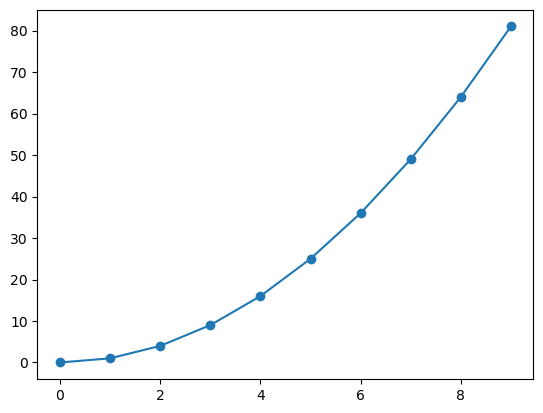

In [88]:
import matplotlib.pyplot as plt
plt.plot(*zip(*xy), 'o-');

### The container-unpacking asterisk

- So what are the asterisks above?
- A single asterisk (`*`) before a container
    - unpacks the container elements
    - **if** it occurs inside a container or function argument list
    - and unpacks keys only of the container is a dictionary
- Some examples

In [89]:
l = [11, 22, 33]
[*l, 44]

[11, 22, 33, 44]

In [90]:
(0, *l, 11)

(0, 11, 22, 33, 11)

In [91]:
print(*l, sep=' ; ')

11 ; 22 ; 33


In [92]:
print(11, 22, 33, sep=' ; ')

11 ; 22 ; 33


- What does this mean for our zipping and plotting?
- We need to provide every list that we want to zip over as one argument to `zip()`, as if we wrote
  ```python
  zip((1, 1), (2, 4), (3, 9), ...)
  ```
- `*xy` does precisely this unpacking for us, as we can see by the following calls to `print()`

##### ... without unpacking

In [93]:
print(xy, sep=' ; ')

[(0, 0), (1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36), (7, 49), (8, 64), (9, 81)]


##### ... with unpacking

In [94]:
print(*xy, sep=' ; ')

(0, 0) ; (1, 1) ; (2, 4) ; (3, 9) ; (4, 16) ; (5, 25) ; (6, 36) ; (7, 49) ; (8, 64) ; (9, 81)


- Now consider the plot command
  ```python
  plt.plot(*zip(*xy), 'o-');
  ```
- `*xy` unpacks the original data for use by `zip()`, providing ten pairs of numbers
- `*zip()` unpacks the two lists returned by `zip()`, providing x- and y-values to `plot()`.

#### Zip: beware of missing data!

- `zip()` stops as soon as one of the containers provided as input runs out of data
- This can lead to difficult-to-find errors

In [95]:
list(zip([1, 2, 3, 4, 5], [10, 20, 30]))

[(1, 10), (2, 20), (3, 30)]

#### Dictionary unpacking

- Unpacking dictionaries with a single `*` gives the keys
- Unpacking dictionaries with with `**` gives key-value pairs
    - Only allowed insided dictionaries or argument lists
    - Inside argument lists, key-value pairs turn into `parameter=value`

In [96]:
d = {1: 2, 3: 4}
{**d, 5:6}

{1: 2, 3: 4, 5: 6}

In [97]:
prop = {'sep': ';', 'end': '###'}
print(1, 2, 3, **prop)

1;2;3###

In [98]:
print(1, 2, 3, sep=';', end='###')

1;2;3###

---
# NumPy arrays


- Python lists can contain "anything"
    - Flexible, but requires much space and time
- NumPy
    - Arrays containing a *fixed number* of elements of *the same data type*
    - Compact and efficient storage
    - Many mathematical operations can be applied to entire array

In [99]:
import numpy as np
import math

In [100]:
x = np.array([0, 1., 2, 3, 4, 5, 6])
3 * x + 2

array([ 2.,  5.,  8., 11., 14., 17., 20.])

## Array properties
- `ndim`: number of dimensions
- `size`: total number of elements
- `shape`: rows, columns, ...
- `dtype`: data type of elements
- `nbytes`: number of bytes occupied by data

In [101]:
print('x.ndim  :', x.ndim)
print('x.size  :', x.size)
print('x.shape :', x.shape)
print('x.dtype :', x.dtype)
print('x.nbytes:', x.nbytes)

x.ndim  : 1
x.size  : 7
x.shape : (7,)
x.dtype : float64
x.nbytes: 56


## Creating Arrays

### Numbers with fixed spacing: `linspace(a, b)`
- Creates array with 50 numbers from $a$ to $b$
- Both $a$ and $b$ er included
- Fixed interval between numbers: $(b-a)/49$
- You get an array with 100 numbers using `linspace(a, b, num=100)`

In [102]:
np.linspace(1, 50)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [103]:
np.linspace(0, 1, num=11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

### Numbers with logarithmic spacing: `logspace(a, b)`

- Creates array with 50 numbers from $10^a$ to $10^b$
- Both $10^a$ and $10^b$ are included
- Logarithmic distance between numbers (fixed factor)

In [104]:
np.logspace(-1, 1, num=10)

array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])

### Some other functions generating arrays

- take shape as first argument, data type is optional (default is `float`)
- `zeros()`: array of zeros of given size
- `ones()`: array of ones of given size
- `empty()`: array with uninitialized data
- `arange()`: similar to range, really useful only for arrays of integers
- `*_like()`: create array with same shape as argument

In [105]:
np.empty(10)

array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])

- Note that the content if an array created with `empty()` is entirely unpredictable!

## Working with data in multiple dimensions

- We will stick to one and two dimensions here
- Key concepts:
    - Operations are applied element-wise if both operands have same size
    - Otherwise, NumPy attempts to *broadcast*
        - The smaller operand is replicated as many times as necessary to create an array that matches the larger operand
        - The operation is then applied element-wise

### Example: array and array of same size

In [106]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[10, 20], [30, 40], [50, 60]])
print(a)
print(b)
print(a+b)

[[1 2]
 [3 4]
 [5 6]]
[[10 20]
 [30 40]
 [50 60]]
[[11 22]
 [33 44]
 [55 66]]


In [107]:
a * b

array([[ 10,  40],
       [ 90, 160],
       [250, 360]])

- Note: **Element-wise multiplication, not matrix multiplication in mathematical sense**!

### Mathematical matrix-matrix/matrix-vector multiplication

- Available in Python 3.5 and later
- First factor must have as many columns as the second has rows
- `a` and `b` are both 3x2, so we get an error

In [108]:
a @ b

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

- We *transpose* `b` (flip about diagonal) to make it 2x3
- Now dimensions are compatible

In [109]:
a @ b.T

array([[ 50, 110, 170],
       [110, 250, 390],
       [170, 390, 610]])

### Example: array and scalar

In [110]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [111]:
a + 100

array([[101, 102],
       [103, 104],
       [105, 106]])

### Example: 2D- and 1D arrays

In [112]:
c = np.array([100, 200])
c

array([100, 200])

In [113]:
a + c

array([[101, 202],
       [103, 204],
       [105, 206]])

- `c` has been added to each row of `a`
- What happens for 3-element array?

In [114]:
d = np.array([10, 20, 30])
d

array([10, 20, 30])

In [115]:
a + d

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

- NumPy sees `d` as 1x3 vector, so shape does not fit
- Need to transpose first!
- But because `d` has only one dimension, transposing it has no effect

In [116]:
d.T

array([10, 20, 30])

- We need to define a two-dimensional array that has one row and three columns (note the extra brackets!)
- That can be transposed

In [117]:
dd = np.array([[10, 20, 30]])
dd

array([[10, 20, 30]])

In [118]:
dd.T

array([[10],
       [20],
       [30]])

In [119]:
a + dd.T

array([[11, 12],
       [23, 24],
       [35, 36]])

### Arrays vs Lists

- NumPy arrays differ in several ways from Python lists, especially
    - arrays have fixed size
    - all entries in an array have the same data type (exceptions apply)
- This makes arrays much more efficient in time and space than lists

#### Performance comparison

- List and array with 1.000.000 entries
- Compute sine of all elements

In [120]:
lx = list(range(0, 1000000))
ax = np.array(lx)

In [121]:
%timeit sinlx = [math.sin(x) for x in lx]

124 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [122]:
%timeit sinax = np.sin(ax)

12 ms ± 73.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [123]:
sinlx = [math.sin(x) for x in lx]
sinax = np.sin(ax)
all(sinlx == sinax)

True

- NumPy is *significantly* faster than list comprehension
- This applies mainly when we apply NumPy functions to large arrays
- For scalars, `math` functions are usually faster than `numpy` functions

### Arrays slices are view: An important difference from lists

- See also [Copies and Views Tutorial](http://scipy-lectures.github.io/intro/numpy/array_object.html#copies-and-views)
- Array slices are so-called *views*:
    - If `a` is a Numpy array, and `b = a[m:n:s]`, then `b` is a *view* of array `a`
    - `a` and `b` are distinct objects (i.e., `id(a) != id(b)`)
    - `a` and `b` are both of type `numpy.ndarray`
    - `a` and `b` ***share the same underlying data***: `b` just restricts what we see of the data in `a`
    - Therefore, any change to data in `b` also affects data in `a`

In [124]:
a = np.array([1, 2, 3, 4, 5])
b = a[:3]
b[0] = 10
print(a)
print(b)

[10  2  3  4  5]
[10  2  3]


- In contrast, slicing a list gives a new list object

In [125]:
l = [1, 2, 3, 4, 5]
k = l[:3]
k[0] = 10
print(l)
print(k)

[1, 2, 3, 4, 5]
[10, 2, 3]


#### Summary: list slicing *vs* array slicing

- For a normal Python *list* `l`, `l[:]` is a **copy**  of the elements in `l`, i.e., a new list object, that can be manipulated without affecting `l`. 
- For an array `a`, `a[:]` is a **view** of `a` with the same underlying data as `a` and changing data through this view *will change* the data in `a`.